# In this file we calibrate the rough Heston model through the image based approach
In the forward pass we learn the **mapping** between **rough Heston parameters** and the entire implied volatility **surface**, which in this case is on a fixed grid 11(strikes)x8(maturities).  
Below we upload the dataset .

In [1]:
#Set the directory of stored dataset
import os
os.chdir("C:/Users/pc/Desktop/politecnico/TESI/mio codice/rHeston/pointwise")

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load the dataset
file_path = "rHestonflatFixedGridsDataset.csv"
df = pd.read_csv(file_path)

# Constants
options_per_set = 88  # number of options per parameter set

# Extract the number of parameter sets
num_sets = len(df) // options_per_set

# Extract the 4 rough Heston parameters (first 4 columns)
# Take one row every 88 rows (because parameters repeat for each option set)
xx = df.iloc[::options_per_set, :4].values  # shape will be (14032, 4)

# Extract implied volatilities
ivs_flat = df.iloc[:, 6].values

# Reshape implied volatilities into (num_sets, options_per_set) (14032, 88)
clean_ivs = ivs_flat.reshape(num_sets, options_per_set)

#define strikes and maturities
strikes=np.array([0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5 ])
maturities=np.array([0.1,0.3,0.6,0.9,1.2,1.5,1.8,2.0 ])

# Print results
print("Input (rHeston parameters) shape:", xx.shape)
print("Clean implied vols shape:", clean_ivs.shape)
print("\nFirst parameter set:", xx[0])
print("\nFirst row of implied vols (88 values):", clean_ivs[0])

Input (rHeston parameters) shape: (14032, 4)
Clean implied vols shape: (14032, 88)

First parameter set: [ 0.09988963  0.62535715 -0.26080363  0.07983231]

First row of implied vols (88 values): [0.64872359 0.56231116 0.47992252 0.39814869 0.31445118 0.24115731
 0.25596344 0.30325519 0.34646731 0.38411643 0.41719648 0.51537984
 0.45118853 0.39080813 0.33253622 0.27665252 0.23363192 0.23405806
 0.25966183 0.28742661 0.31308175 0.33626391 0.44664808 0.39416201
 0.34551886 0.29980068 0.25807806 0.2279981  0.22455626 0.23979873
 0.25928364 0.27845439 0.29630902 0.41103717 0.36474571 0.32231994
 0.2831725  0.24850518 0.22426157 0.21978066 0.23028873 0.24552686
 0.26127061 0.27628756 0.38759678 0.34544973 0.30716186 0.27231767
 0.24212501 0.22136182 0.21649321 0.22423255 0.23680191 0.25026589
 0.26341405 0.3703811  0.33130354 0.29607355 0.26436244 0.2373792
 0.21894607 0.21401262 0.21993748 0.23053957 0.24237397 0.25411529
 0.35689989 0.32024326 0.2874113  0.2581292  0.2335434  0.21685054
 0

# Let's have a look at the dataset and gain some more informations


=== rough HESTON PARAMETERS ANALYSIS (xx) ===
       H (Hurst exponent)  ν (vol of variance)  ρ (spot-vol correlation)  \
count          14032.0000           14032.0000                14032.0000   
mean               0.1229               0.4196                   -0.4120   
std                0.0679               0.1371                    0.1710   
min                0.0100               0.1501                   -0.7000   
1%                 0.0118               0.1607                   -0.6941   
5%                 0.0209               0.1929                   -0.6719   
50%                0.1200               0.4249                   -0.4167   
95%                0.2346               0.6274                   -0.1349   
99%                0.2468               0.6457                   -0.1077   
max                0.2500               0.6499                   -0.1000   

       ν₀ (initial variance)  
count             14032.0000  
mean                  0.0716  
std                   0

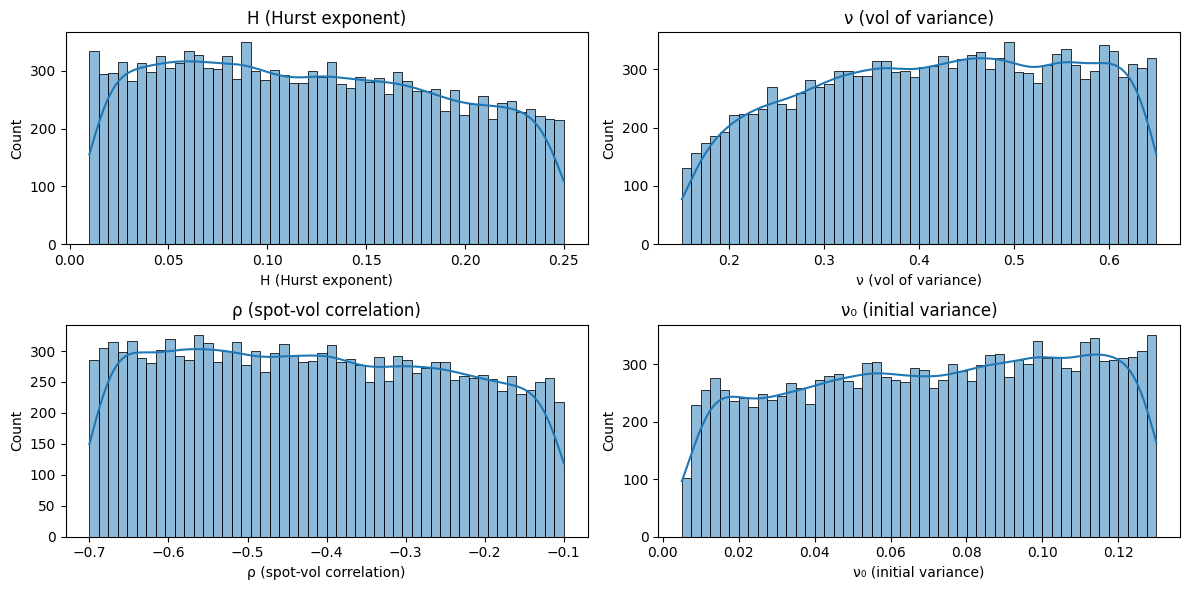


=== IMPLIED VOLATILITY SURFACE ANALYSIS (yy) ===
Global mean: 0.2697
Global min: 0.0305
Global max: 0.8111

Volatility matrix for strikes/maturities (first sample):
        0.5     0.6     0.7     0.8     0.9     1.0     1.1     1.2     1.3  \
0.1  0.6487  0.5623  0.4799  0.3981  0.3145  0.2412  0.2560  0.3033  0.3465   
0.3  0.5154  0.4512  0.3908  0.3325  0.2767  0.2336  0.2341  0.2597  0.2874   
0.6  0.4466  0.3942  0.3455  0.2998  0.2581  0.2280  0.2246  0.2398  0.2593   
0.9  0.4110  0.3647  0.3223  0.2832  0.2485  0.2243  0.2198  0.2303  0.2455   
1.2  0.3876  0.3454  0.3072  0.2723  0.2421  0.2214  0.2165  0.2242  0.2368   
1.5  0.3704  0.3313  0.2961  0.2644  0.2374  0.2189  0.2140  0.2199  0.2305   
1.8  0.3569  0.3202  0.2874  0.2581  0.2335  0.2169  0.2119  0.2166  0.2257   
2.0  0.3493  0.3140  0.2826  0.2546  0.2314  0.2156  0.2107  0.2146  0.2230   

        1.4     1.5  
0.1  0.3841  0.4172  
0.3  0.3131  0.3363  
0.6  0.2785  0.2963  
0.9  0.2613  0.2763  
1.2  0.2503 

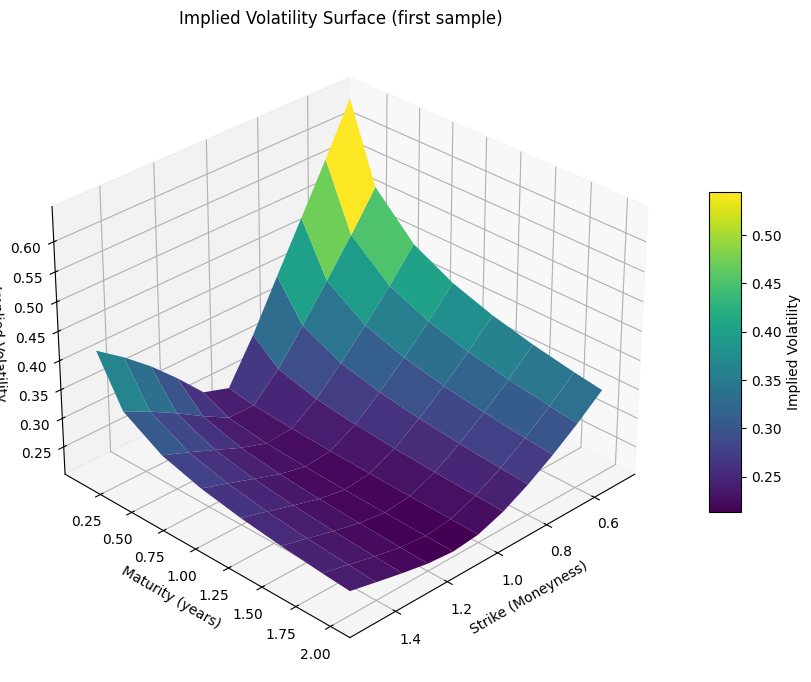

In [3]:
import seaborn as sns

#INPUT (rHESTON PARAMETERS) ANALYSIS 

# rHeston parameter names (for clarity)
#H     ∈ [0.01, 0.25]        (Hurst exponent)
#ν     ∈ [0.15, 0.65]        (initial variance)
#ρ     ∈ [-0.7, -0.1]        (spot-vol correlation)
#ν₀    ∈ [0.005, 0.13]       (vol of variance)

param_names = [
    'H (Hurst exponent)',
    'ν (vol of variance)',
    'ρ (spot-vol correlation)',
    'ν₀ (initial variance)'
]


# Create DataFrame for statistical analysis
df_xx = pd.DataFrame(xx, columns=param_names)

# Descriptive statistics
print("\n=== rough HESTON PARAMETERS ANALYSIS (xx) ===")
print(df_xx.describe(percentiles=[0.01, 0.05, 0.95, 0.99]).round(4))

# Validate physical bounds
print("\n=== PHYSICAL BOUNDS ===")
# Validate physical bounds
print("\n=== PHYSICAL BOUNDS ===")
print(f"ν₀:    Min={df_xx.iloc[:,3].min():.4f}, Max={df_xx.iloc[:,3].max():.4f} (Expected: ~[0.005, 0.13])")
print(f"ρ:   Min={df_xx.iloc[:,2].min():.4f}, Max={df_xx.iloc[:,2].max():.4f} (Expected: ~[-0.7, -0.1])")
print(f"H: Min={df_xx.iloc[:,0].min():.4f}, Max={df_xx.iloc[:,0].max():.4f} (Expected: ~[0.01, 0.25])")

# Plot distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_xx.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_xx[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#OUTPUT (IMPLIED VOLATILTY SURFACE) ANALYSIS 
print("\n=== IMPLIED VOLATILITY SURFACE ANALYSIS (yy) ===")

# Global statistics
print(f"Global mean: {clean_ivs.mean():.4f}")
print(f"Global min: {clean_ivs.min():.4f}")
print(f"Global max: {clean_ivs.max():.4f}")

# Reshape first sample into strike/maturity matrix
vol_matrix = clean_ivs[0].reshape(len(maturities), len(strikes))
df_vol = pd.DataFrame(vol_matrix, index=maturities, columns=strikes)

print("\nVolatility matrix for strikes/maturities (first sample):")
print(df_vol.round(4))

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create grid for surface plot
X, Y = np.meshgrid(strikes, maturities)

# Plot surface
surf = ax.plot_surface(X, Y, vol_matrix, cmap='viridis', edgecolor='none')

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Implied Volatility')

# Set labels and title
ax.set_xlabel('Strike (Moneyness)')
ax.set_ylabel('Maturity (years)')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface (first sample)')

# Adjust view angle for better visualization
ax.view_init(30, 45)

# Adjust layout to prevent clipping
plt.tight_layout(pad=4.0)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

plt.show()

# Step 1: Data Generation

## **Inputs:** 
###  1. $H$ Hurst exponent
###  2. $\gamma$ vol of variance
###  3. $\rho$ spot-vol correlation
###  4. $\nu_{0}$ inital variance
    
## **Outputs:**
### Implied volatility surface (8x11=88 points)

# Scaling:

# Model Parameters ${\theta}_{i=1,..,4}\to scale(\theta_i)\in[-1,1]$
## $scale(\theta_i)=\frac{2\theta_i-(\theta_i^{max}+\theta_i^{min})}{\theta_i^{max}-\theta_i^{min}},\quad i \in |\Theta|$

# Implied volatilities
## $$scale(\sigma^{BS}_{i,j})=\frac{\sigma^{BS}_{i,j}-\mathbb{E}[\sigma^{BS}_{i,j}]}{std(\sigma^{BS}_{i,j})},\quad i\in\text{Maturities},\; j\in \text{Strikes}$$

In [4]:
#Train+val(90%)-test(10%) split of data 
from sklearn.model_selection import train_test_split
from tabulate import tabulate

X_train_val, X_test, y_train_val, y_test = train_test_split(
    xx, clean_ivs, test_size=0.1, random_state=42)

#Train(85%)-val(15%) split of data 
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.11, random_state=42)

#data preprocessing (scaling)
from sklearn.preprocessing import StandardScaler

#1- Apply standard (z-score) scaling to target volatilities
#  to train, validation and test data (clearly without recomputing mu and sigma for validation and test data)
scaler_yy = StandardScaler()
y_train_transform = scaler_yy.fit_transform(y_train)  #we compute mu and sigma
y_val_transform = scaler_yy.transform(y_val)  
y_test_transform = scaler_yy.transform(y_test)

#define the inverse transform of data to bring volatilities back to original values
def yinversetransform(x):
    return scaler_yy.inverse_transform(x)

# ========================================================================
#2-Custom [-1,1] rHeston parameter scaling, define rHeston parameter's upper and lower bounds
# ===============================================================================
#H     ∈ [0.01, 0.25]        (Hurst exponent)
#ν     ∈ [0.15, 0.65]        (initial variance)
#ρ     ∈ [-0.7, -0.1]        (spot-vol correlation)
#ν₀    ∈ [0.005, 0.13]       (vol of variance)

#parameters order is: [H, ν, ρ, ν₀]

ub=np.array([0.25,0.65,-0.1,0.13])
lb=np.array([0.01,0.15,-0.7,0.005])

#define the direct and inverse map (as described above)
def myscale(x):
    res=np.zeros(x.shape)
    for i in range(x.shape[1]):
        res[:,i]=(2*x[:,i] - (ub[i] + lb[i])) / (ub[i] - lb[i])
        
    return res

def myinverse(x):
    res=np.zeros(x.shape)
    for i in range(x.shape[1]):
        res[:,i]=x[:,i] * (ub[i] - lb[i]) * 0.5 + (ub[i] + lb[i]) * 0.5
        
    return res

#scale parameters in training, validation and test set
x_train_transform = myscale(X_train)
x_val_transform = myscale(X_val)
x_test_transform = myscale(X_test)

# Print dataset shapes in a table
shape_data = [
    ["Training", x_train_transform.shape, y_train_transform.shape],
    ["Validation", x_val_transform.shape, y_val_transform.shape],
    ["Test", x_test_transform.shape, y_test_transform.shape]
]

print("\nDataset Shapes Summary:")
print(tabulate(shape_data, 
               headers=["Dataset", "Input Features Shape", "Target Volatilities Shape"],
               tablefmt="grid"))


Dataset Shapes Summary:
+------------+------------------------+-----------------------------+
| Dataset    | Input Features Shape   | Target Volatilities Shape   |
+============+========================+=============================+
| Training   | (11238, 4)             | (11238, 88)                 |
+------------+------------------------+-----------------------------+
| Validation | (1390, 4)              | (1390, 88)                  |
+------------+------------------------+-----------------------------+
| Test       | (1404, 4)              | (1404, 88)                  |
+------------+------------------------+-----------------------------+


# Let's see if the scaling has been correctly applied

In [5]:
# ----------------------------------------------------------------------------------
# 1. Verify OUTPUT Scaling (yy: Implied Volatilities - StandardScaler)
# ----------------------------------------------------------------------------------
def check_yy_scaling(y_train, y_val, y_test, y_train_transform, y_val_transform, y_test_transform):
    # Calculate statistics for each set
    stats_train = {
        "Set": "Train",
        "Mean": np.mean(y_train_transform, axis=0).round(3)[0],
        "Std": np.std(y_train_transform, axis=0).round(3)[0],
        "Min": np.min(y_train_transform).round(3),
        "Max": np.max(y_train_transform).round(3),
        "Inverse Check": np.allclose(y_train, yinversetransform(y_train_transform))
    }
    
    stats_val = {
        "Set": "Validation",
        "Mean": np.mean(y_val_transform, axis=0).round(3)[0],
        "Std": np.std(y_val_transform, axis=0).round(3)[0],
        "Min": np.min(y_val_transform).round(3),
        "Max": np.max(y_val_transform).round(3),
        "Inverse Check": np.allclose(y_val, yinversetransform(y_val_transform))
    }
    
    stats_test = {
        "Set": "Test",
        "Mean": np.mean(y_test_transform, axis=0).round(3)[0],
        "Std": np.std(y_test_transform, axis=0).round(3)[0],
        "Min": np.min(y_test_transform).round(3),
        "Max": np.max(y_test_transform).round(3),
        "Inverse Check": np.allclose(y_test, yinversetransform(y_test_transform))
    }
    
    # Create table
    df_yy = pd.DataFrame([stats_train, stats_val, stats_test])
    print("\n=== IMPLIED VOLATILITIES SCALING (StandardScaler) ===")
    print(tabulate(df_yy, headers='keys', tablefmt='pretty', showindex=False))

# ----------------------------------------------------------------------------------
# 2. Verify INPUT Scaling (xx: Heston Parameters - Custom [-1,1])
# ----------------------------------------------------------------------------------
def check_xx_scaling(X_train, X_val, X_test, x_train_transform, x_val_transform, x_test_transform):
    # Parameter names
    param_names = ["H", "ν", "ρ", "ν₀"]
    
    # Calculate min/max after scaling and check bounds
    data = {
        "Parameter": param_names,
        "Original Min": [X_train[:,i].min().round(4) for i in range(4)],
        "Original Max": [X_train[:,i].max().round(4) for i in range(4)],
        "Scaled Min (Train)": [x_train_transform[:,i].min().round(4) for i in range(4)],
        "Scaled Max (Train)": [x_train_transform[:,i].max().round(4) for i in range(4)],
    }
    
    df_xx = pd.DataFrame(data)
    print("\n=== rough HESTON PARAMETERS SCALING (Custom [-1,1]) ===")
    print(tabulate(df_xx, headers='keys', tablefmt='pretty', showindex=False))
    
    print("\n=== VERIFY INVERSE TRANSFORMATION OF SCALED HESTON PARAMETERS (xx) ===")
    print(f"Train: {np.allclose(X_train, myinverse(x_train_transform))}")
    print(f"Val:   {np.allclose(X_val, myinverse(x_val_transform))}")
    print(f"Test:  {np.allclose(X_test, myinverse(x_test_transform))}")

    # Global check: All scaled values must be in [-1, 1]
    assert np.all(x_train_transform >= -1) and np.all(x_train_transform <= 1), "Some values are outside [-1,1]!"
    print("\n✔ All scaled parameters are within [-1,1]")

# ----------------------------------------------------------------------------------
# Run checks
# ----------------------------------------------------------------------------------
check_yy_scaling(y_train, y_val, y_test, y_train_transform, y_val_transform, y_test_transform)
check_xx_scaling(X_train, X_val, X_test, x_train_transform, x_val_transform, x_test_transform)


=== IMPLIED VOLATILITIES SCALING (StandardScaler) ===
+------------+--------+-------+--------+-------+---------------+
|    Set     |  Mean  |  Std  |  Min   |  Max  | Inverse Check |
+------------+--------+-------+--------+-------+---------------+
|   Train    |  -0.0  |  1.0  | -3.069 | 4.048 |     True      |
| Validation | -0.027 | 0.991 | -2.65  | 3.256 |     True      |
|    Test    | -0.029 | 1.005 | -2.951 | 3.485 |     True      |
+------------+--------+-------+--------+-------+---------------+

=== rough HESTON PARAMETERS SCALING (Custom [-1,1]) ===
+-----------+--------------+--------------+--------------------+--------------------+
| Parameter | Original Min | Original Max | Scaled Min (Train) | Scaled Max (Train) |
+-----------+--------------+--------------+--------------------+--------------------+
|     H     |     0.01     |     0.25     |      -0.9997       |       0.9999       |
|     ν     |    0.1501    |    0.6499    |      -0.9998       |       0.9996       |
|  

# CaNN: Calibration Neural Network
Step 1: *Forward Pass*
Now we can train the network to learn the **mapping** from: rough Heston parameters -> implied volatility surface. we can set up our neural network composed of:

- **4 hidden layers**, each with **30 neurons**  
- **output layer** with 8 x 11= 88 neurons (grid dimension), here we select a **linear** activation function because of the preprocessing of implied volatilities
- **Activation function**: **Elu** , $\sigma_{Elu}=\alpha(e^x -1)$ in all the layers, it's smoothness is crucial for the approximation of the Loss function
- **Batch size**: **128**  
- **Optimizer**: **Adam**  
- **Early stopping**: with patience set to 25 epochs
- **Loss**: MSE

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

# Set precision to float64
tf.keras.backend.set_floatx('float64')
tf.random.set_seed(42)  # For consistent initialization

# Build the model
inputs = Input(shape=(4,), name='input_layer')
x1 = Dense(30, activation='elu', name='hidden_1')(inputs)
x2 = Dense(30, activation='elu', name='hidden_2')(x1) 
x3 = Dense(30, activation='elu', name='hidden_3')(x2) 
x4 = Dense(30, activation='elu', name='hidden_4')(x3)
outputs = Dense(88, activation='linear', name='output_layer')(x4)

modelGEN = Model(inputs=inputs, outputs=outputs, name = 'IV_model')
modelGEN.summary()

Model: "IV_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_4 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 88)             │         2,728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,668 (44.28 KB)

 Trainable params: 5,668 (44.28 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7141 - val_loss: 0.1003
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0723 - val_loss: 0.0267
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235 - val_loss: 0.0176
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0138
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 - val_loss: 0.0110
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 - val_loss: 0.0089
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 8/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 9/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 10/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 11/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 12/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

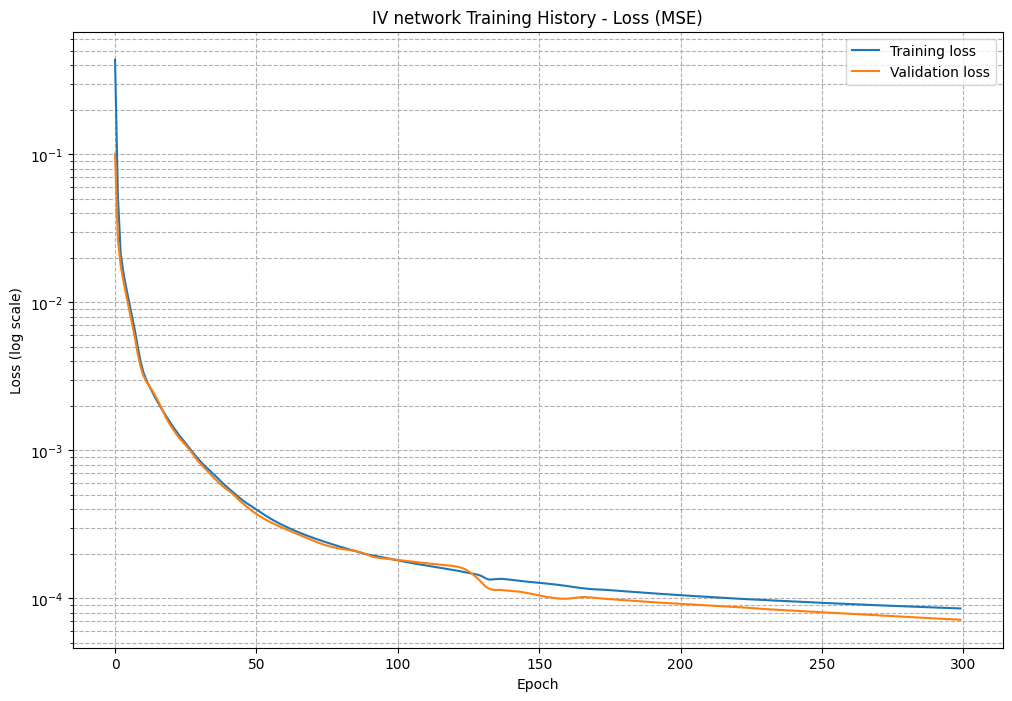


Final Training Loss: 8.5657e-05
Final Validation Loss: 7.1885e-05


In [7]:
import time
# EarlyStopping callback
earlystop = EarlyStopping(
    monitor='val_loss', 
    patience=30,       
    verbose=1,       
    restore_best_weights=True  # Restore the best model weights
)

# Callbacks
#reduce_lr = ReduceLROnPlateau(
#        monitor='val_loss',
#        factor=0.5,
#        patience=20,
#        min_lr=5e-5,
 #       verbose=1
 #   )

# Compile the model
modelGEN.compile(loss="mse", optimizer="adam")

# Train the model
start=time.time()
history = modelGEN.fit(
    x_train_transform, 
    y_train_transform, 
    batch_size=128,
    validation_data=(x_val_transform, y_val_transform),
    epochs=300, 
    verbose=1, 
    shuffle=True, 
    callbacks=[earlystop]
)
end=time.time()
training_time=(end-start)
print("Training time :" ,training_time , "s" )

# Plot training history
plt.figure(figsize=(12, 8))  
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.title('IV network Training History - Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Print final metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"\nFinal Training Loss: {final_train_loss:.4e}")
print(f"Final Validation Loss: {final_val_loss:.4e}")

# Evaluate the map on test data

In [8]:
# Calculate predictions on preprocessed test data
y_pred_transformed = modelGEN.predict(x_test_transform)

# 1) Error on preprocessed test data (y_test_transform)
mse_transformed = np.mean(np.square(y_test_transform - y_pred_transformed))
rmse_transformed = np.sqrt(mse_transformed)

print("\nErrors on preprocessed test data:")
print(f"- MSE: {mse_transformed:.6f}")
print(f"- RMSE: {rmse_transformed:.6f}")

# 2) Error on original scale test data (inverse transformed)
y_pred_original = yinversetransform(y_pred_transformed)

mse_original = np.mean(np.square(y_test - y_pred_original))
rmse_original = np.sqrt(mse_original)

print("\nErrors on original scale test data:")
print(f"- MSE: {mse_original:.7f}")
print(f"- RMSE: {rmse_original:.7f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Errors on preprocessed test data:
- MSE: 0.000094
- RMSE: 0.009693

Errors on original scale test data:
- MSE: 0.0000004
- RMSE: 0.0006054


# Optimizing the training
Numpy Implementation of the Neural Network tends to be faster than Keras

In [12]:
import scipy.optimize
import matplotlib.ticker as mtick

def extract_weights_from_keras_model(model):
    """
    Extract weights and bias from the trained keras network, format for Numpy usage
    """
    weights_and_biases = []
    
    # Estrai pesi e bias per ogni layer
    for layer in model.layers:
        if hasattr(layer, 'get_weights') and layer.get_weights():
            weights, biases = layer.get_weights()
            weights_and_biases.append([weights, biases])
    
    return weights_and_biases

NNParameters = extract_weights_from_keras_model(modelGEN)

# =====================================================================================
# NUMPY IMPLEMENTATION OF THE NN (FASTER THAN KERAS)
# =====================================================================================

# Network hyperparameters
NumLayers = 4  # 4 hidden layers
OutputSize = 88  # 88 ivs

def elu(x):
    """
    Elu activation function
    """
    ind = (x < 0)
    x[ind] = np.exp(x[ind]) - 1
    return x

def eluPrime(y):
    """
    ELU derivative
    """
    x = np.copy(y)
    ind = (x < 0)
    x[ind] = np.exp(x[ind])
    x[~ind] = 1
    return x

def NeuralNetwork(x):
    """
    Forward pass of NN
    Input: x - array of 4 scaled rough Heston parameters
    Output: array of 88 ivs
    """
    input1 = x.copy()
    
    # Hidden layers with Elu activation
    for i in range(NumLayers):
        input1 = np.dot(input1, NNParameters[i][0]) + NNParameters[i][1]
        input1 = elu(input1)
    
    # Output layer (linear)
    i += 1
    output = np.dot(input1, NNParameters[i][0]) + NNParameters[i][1]
    
    return output

def NeuralNetworkGradient(x):
    """
    Compute network gradient w.r to rough Heston parameters
    Output: Jacobian of dimension (88, 4)
    """
    input1 = x.copy()
    
    # Identity matrix for initial Jacobian
    grad = np.eye(4)
    
    # Propagate gradient via chain rule
    for i in range(NumLayers):
        # Forward pass 
        z = np.dot(input1, NNParameters[i][0]) + NNParameters[i][1]
        
        # Update gradient
        grad = np.einsum('ij,jk->ik', grad, NNParameters[i][0])
        
        # Apply Elu derivative
        grad *= eluPrime(z)
        
        # Update input for next layer
        input1 = elu(z)
    
    # Output layer (lineare, nessuna attivazione)
    grad = np.einsum('ij,jk->ik', grad, NNParameters[i+1][0])
    
    return grad

# Complete test analysis

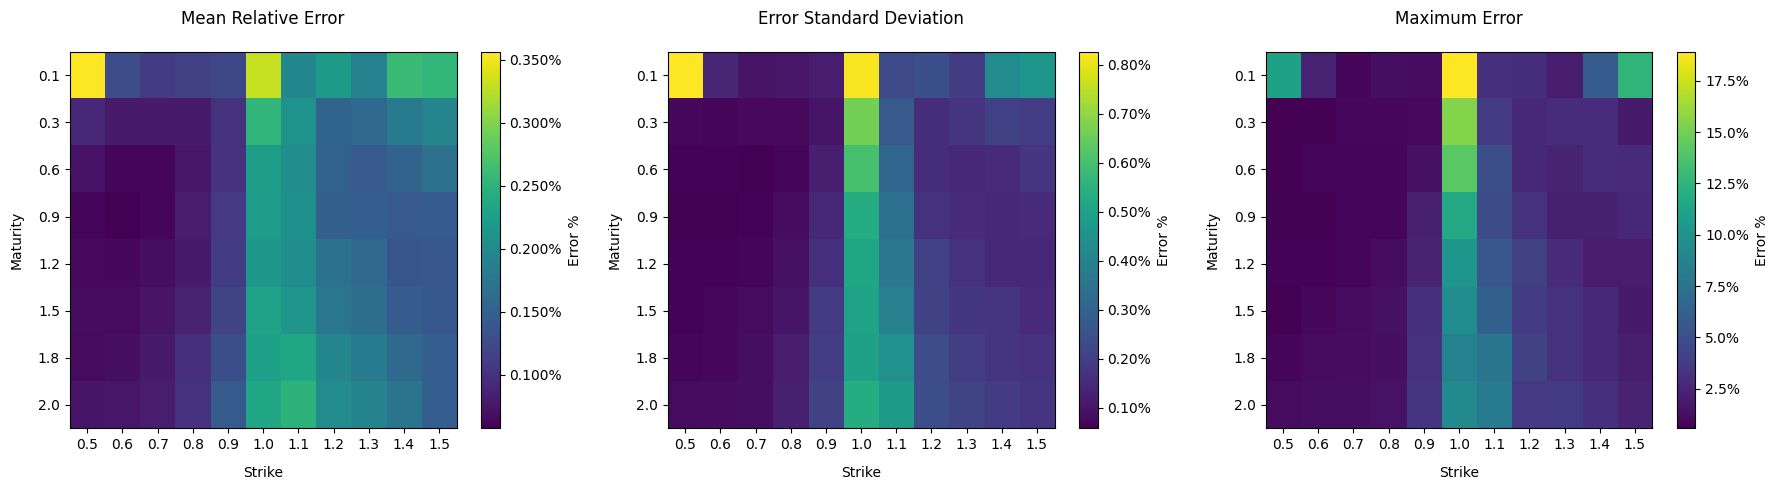

In [9]:
# 1. Generate predictions
#y_pred_transformed = modelGEN.predict(x_test_transform)  # Shape: (n_samples, 88)
#y_pred_original = yinversetransform(y_pred_transformed)  # Convert back to original volatility space

# 2. Calculate relative errors (percentage)
relative_errors = np.abs((y_test - y_pred_original) / y_test) * 100  # Shape: (n_samples, 88)

# 3. Reshape errors to (n_samples, 8 maturities, 11 strikes)
# Note: 88 = 8 maturities × 11 strikes, column-major order (maturities on rows, strikes on columns, in the vector of dimension 88 
# the first 11 implied volatilities refer to the SAME maturity (first), the next 11 iv to next maturity and so on)
relative_errors_reshaped = relative_errors.reshape(-1, len(maturities), len(strikes))

# 4. Create error plots
plt.figure(figsize=(18, 5))

# Plot 1: Mean Relative Error
plt.subplot(1, 3, 1)
mean_error = np.mean(relative_errors_reshaped, axis=0)  # Avg across samples
plt.imshow(mean_error, origin='upper', aspect='auto', cmap="viridis")
plt.colorbar(label='Error %', format=mtick.PercentFormatter())
plt.title("Mean Relative Error", pad=20)
plt.xlabel("Strike", labelpad=10)
plt.ylabel("Maturity", labelpad=10)
plt.xticks(np.arange(len(strikes)), [f"{s}" for s in strikes])
plt.yticks(np.arange(len(maturities)), [f"{m}" for m in maturities])

# Plot 2: Standard Deviation
plt.subplot(1, 3, 2)
std_error = np.std(relative_errors_reshaped, axis=0)
plt.imshow(std_error, origin='upper', aspect='auto', cmap="viridis")
plt.colorbar(label='Error %', format=mtick.PercentFormatter())
plt.title("Error Standard Deviation", pad=20)
plt.xlabel("Strike", labelpad=10)
plt.ylabel("Maturity", labelpad=10)
plt.xticks(np.arange(len(strikes)), [f"{s}" for s in strikes])
plt.yticks(np.arange(len(maturities)), [f"{m}" for m in maturities])

# Plot 3: Maximum Error
plt.subplot(1, 3, 3)
max_error = np.max(relative_errors_reshaped, axis=0)
plt.imshow(max_error, origin='upper', aspect='auto', cmap="viridis")
plt.colorbar(label='Error %', format=mtick.PercentFormatter())
plt.title("Maximum Error", pad=20)
plt.xlabel("Strike", labelpad=10)
plt.ylabel("Maturity", labelpad=10)
plt.xticks(np.arange(len(strikes)), [f"{s}" for s in strikes])
plt.yticks(np.arange(len(maturities)), [f"{m}" for m in maturities])

plt.tight_layout()
plt.show()

# Plot sample smiles

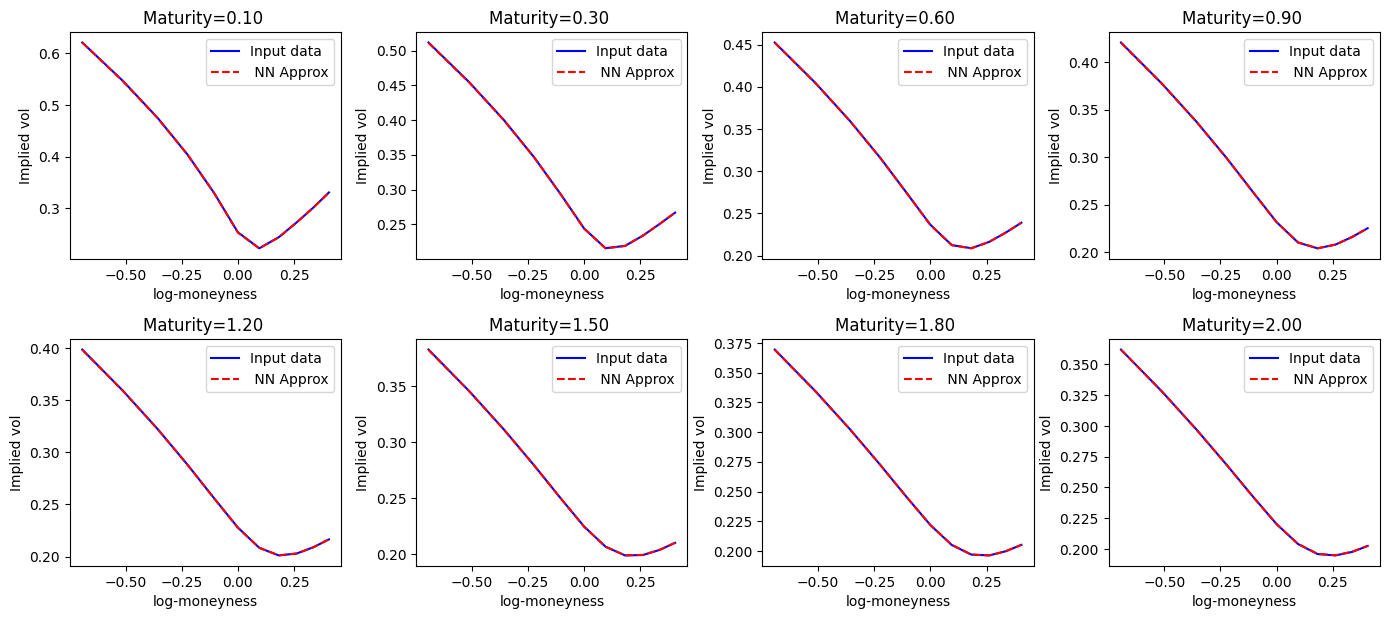

In [14]:
# Take a sample index from the test set
sample_ind = 512
y_sample = y_test[sample_ind]             #take corresponding (not processed)test sample
prediction = y_pred_original[sample_ind]  #take corresponding (converted)prediction

S0=1.0  #specify spot price
strikes_dim = len(strikes)

plt.figure(1,figsize=(14,12))
for i in range(len(maturities)):
    plt.subplot(4,4,i+1)
    
    plt.plot(np.log(strikes/S0),y_sample[i*strikes_dim:(i+1)*strikes_dim],'b',label="Input data")
    plt.plot(np.log(strikes/S0),prediction[i*strikes_dim:(i+1)*strikes_dim],'--r',label=" NN Approx")

    
    plt.title("Maturity=%1.2f "%maturities[i])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")
    
    plt.legend()
plt.tight_layout()
plt.show()

# Second part: Calibration
Step 2: *Backward Pass*
Now that we have trained the forward pass and learnt the map from rough Heston parameters to implied volatility surface we can calibrate online.

Below we'll exploit several gradient based methods:
We can now efficently and **quickly** calibrate the rough Heston parameters.

In [15]:
# Define loss functions.

#1. MSE
def CostFunc(x,sample_ind):
    return np.sum(np.power((NeuralNetwork(x)-y_test_transform[sample_ind]),2))

#2. Compute gradient of cost function w.r. to parameters
def Jacobian(x,sample_ind):
    return 2*np.sum((NeuralNetwork(x)-y_test_transform[sample_ind])*NeuralNetworkGradient(x),axis=1)

#Cost Function for Levenberg Marquardt
def CostFuncLS(x,sample_ind):
    return (NeuralNetwork(x)-y_test_transform[sample_ind])
def JacobianLS(x,sample_ind):
    return NeuralNetworkGradient(x).T

# scale back function for single parameter set
def max_min_scale_inverse(x):
 return x*(ub - lb)*0.5 + (ub + lb)*0.5

In [17]:
# =====================================================================================
# GRADIENT BASED CALIBRATION WITH DIFFERENT ALGORITHMS
# =====================================================================================

# Initialize arrays for results
solutions = np.zeros([4, 4])  # 4 methods, 4 parameters
times = np.zeros(4)

Approx = []
Timing = []

methods = ["L-BFGS-B", "SLSQP", "BFGS", "Levenberg-Marquardt"]
init = np.zeros(4)  # Initial guess for optimization

# Calibrate all surfaces in y_test
for i in range(y_test_transform.shape[0]):
    disp = str(i+1) + "/" + str(len(y_test))
    print(disp, end="\r")
    
    # L-BFGS-B
    start = time.perf_counter()
    I = scipy.optimize.minimize(
        CostFunc, 
        x0=init, 
        args=(i,), 
        method='L-BFGS-B', 
        jac=Jacobian, 
        tol=1e-10,
        options={"maxiter": 5000}
    )
    end = time.perf_counter()
    solutions[0, :] = max_min_scale_inverse(I.x)
    times[0] = end - start
    
    # SLSQP
    start = time.perf_counter()
    I = scipy.optimize.minimize(
        CostFunc, 
        x0=init, 
        args=(i,), 
        method='SLSQP', 
        jac=Jacobian, 
        tol=1e-10,
        options={"maxiter": 5000}
    )
    end = time.perf_counter()
    solutions[1, :] = max_min_scale_inverse(I.x)
    times[1] = end - start
    
    # BFGS
    start = time.perf_counter()
    I = scipy.optimize.minimize(
        CostFunc, 
        x0=init, 
        args=(i,), 
        method='BFGS', 
        jac=Jacobian, 
        tol=1e-10,
        options={"maxiter": 5000}
    )
    end = time.perf_counter()
    solutions[2, :] = max_min_scale_inverse(I.x)
    times[2] = end - start
    
    # Levenberg-Marquardt
    start = time.perf_counter()
    I = scipy.optimize.least_squares(
        CostFuncLS, 
        init, 
        JacobianLS, 
        args=(i,), 
        gtol=1e-10
    )
    end = time.perf_counter()
    solutions[3, :] = max_min_scale_inverse(I.x)
    times[3] = end - start
    
    Approx.append(np.copy(solutions))
    Timing.append(np.copy(times))

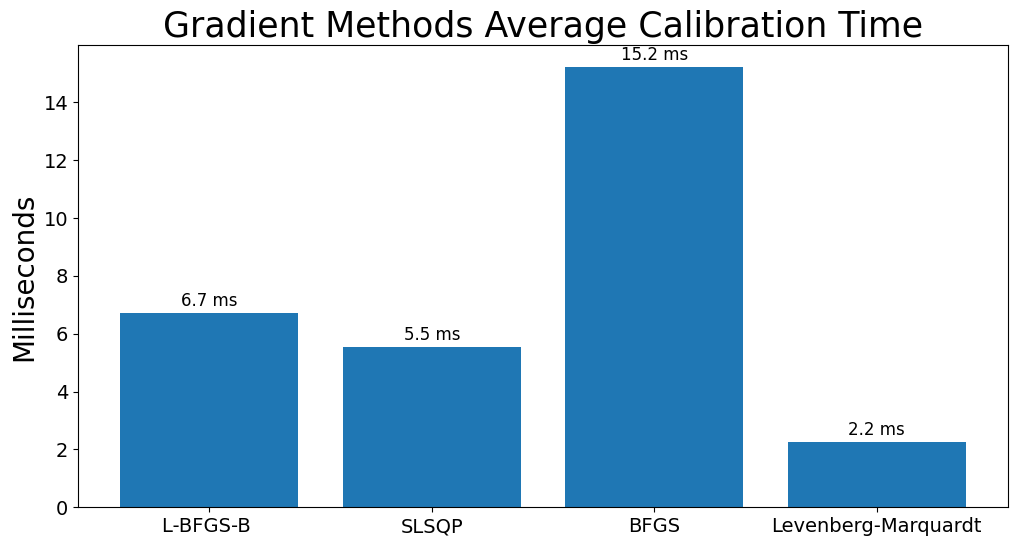

In [20]:
# =====================================================================================
# RESULTS ANALYSIS AND VISUALIZATION
# =====================================================================================

# Plot average calibration times
methods = ["L-BFGS-B ", "SLSQP", "BFGS", "Levenberg-Marquardt"]

# Calculate average times in milliseconds
avg_times_ms = np.mean(Timing, axis=0) * 1000

# Plot settings
plt.figure(1, figsize=(12, 6))
bars = plt.bar(methods, avg_times_ms)

# Add exact numerical values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f} ms',
             ha='center', va='bottom', fontsize=12)
             
plt.title("Gradient Methods Average Calibration Time", fontsize=25)
plt.ylabel("Milliseconds", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

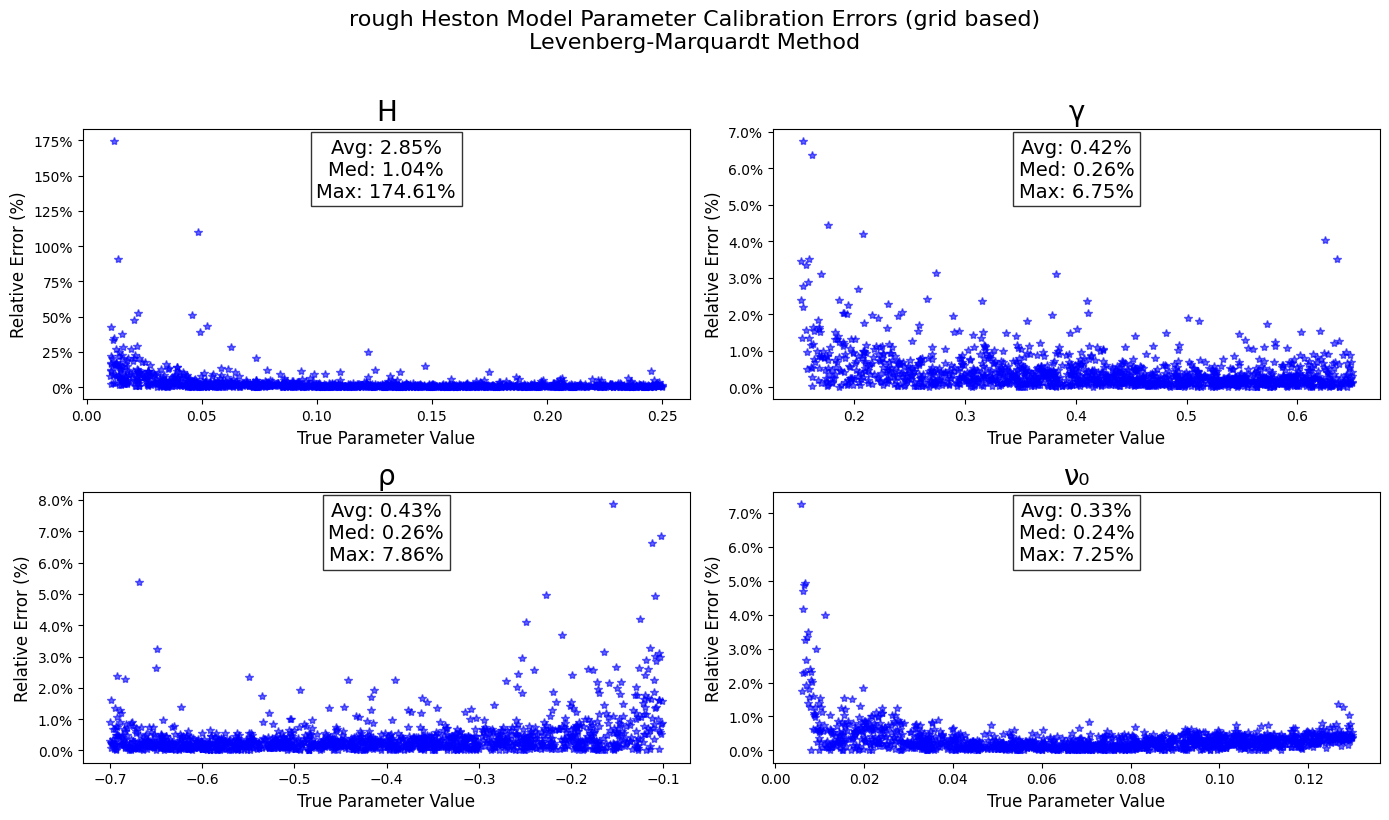


Summary Statistics of Relative Errors (%):
H: Avg=2.85%, Med=1.04%, Max=174.61%
γ: Avg=0.42%, Med=0.26%, Max=6.75%
ρ: Avg=0.43%, Med=0.26%, Max=7.86%
ν₀: Avg=0.33%, Med=0.24%, Max=7.25%


In [21]:
# Extract Levenberg-Marquardt parameters (usually the best performing)
LMParameters = np.array([Approx[i][3] for i in range(len(Approx))])  # Ensure numpy array

# Verify dimensions
assert len(LMParameters) == len(X_test), "Mismatch between calibrated parameters and test set"

# Plot relative errors for each parameter
titles = ["H", "γ", "ρ", "ν₀"]
relative_errors = np.zeros((len(LMParameters), 4))  # Store all relative errors

fig = plt.figure(figsize=(14, 8))
for param_idx in range(4):
    ax = plt.subplot(2, 2, param_idx+1)
    
    # Get true and calibrated parameters
    true_params = X_test[:len(LMParameters), param_idx]
    calibrated_params = LMParameters[:, param_idx]
    
    # Calculate relative errors 
    with np.errstate(divide='ignore', invalid='ignore'):
        rel_errors = np.abs(calibrated_params - true_params) / np.abs(true_params)
    
    relative_errors[:, param_idx] = rel_errors
    
    # Plot
    plt.plot(true_params, 100 * rel_errors, 'b*', alpha=0.6)
    plt.title(titles[param_idx], fontsize=20)
    plt.xlabel('True Parameter Value', fontsize=12)
    plt.ylabel('Relative Error (%)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Add statistics
    stats_text = 'Avg: %1.2f%%\nMed: %1.2f%%\nMax: %1.2f%%' % (
        np.mean(100 * rel_errors),
        np.median(100 * rel_errors),
        np.max(100 * rel_errors))
    
    plt.text(0.5, 0.85, stats_text,
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes,
             fontsize=14,
             bbox=dict(facecolor='white', alpha=0.8))

plt.suptitle('rough Heston Model Parameter Calibration Errors (grid based)\nLevenberg-Marquardt Method', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis
print("\nSummary Statistics of Relative Errors (%):")
for i, title in enumerate(titles):
    print(f"{title}: Avg={np.mean(100*relative_errors[:,i]):.2f}%, "
          f"Med={np.median(100*relative_errors[:,i]):.2f}%, "
          f"Max={np.max(100*relative_errors[:,i]):.2f}%")

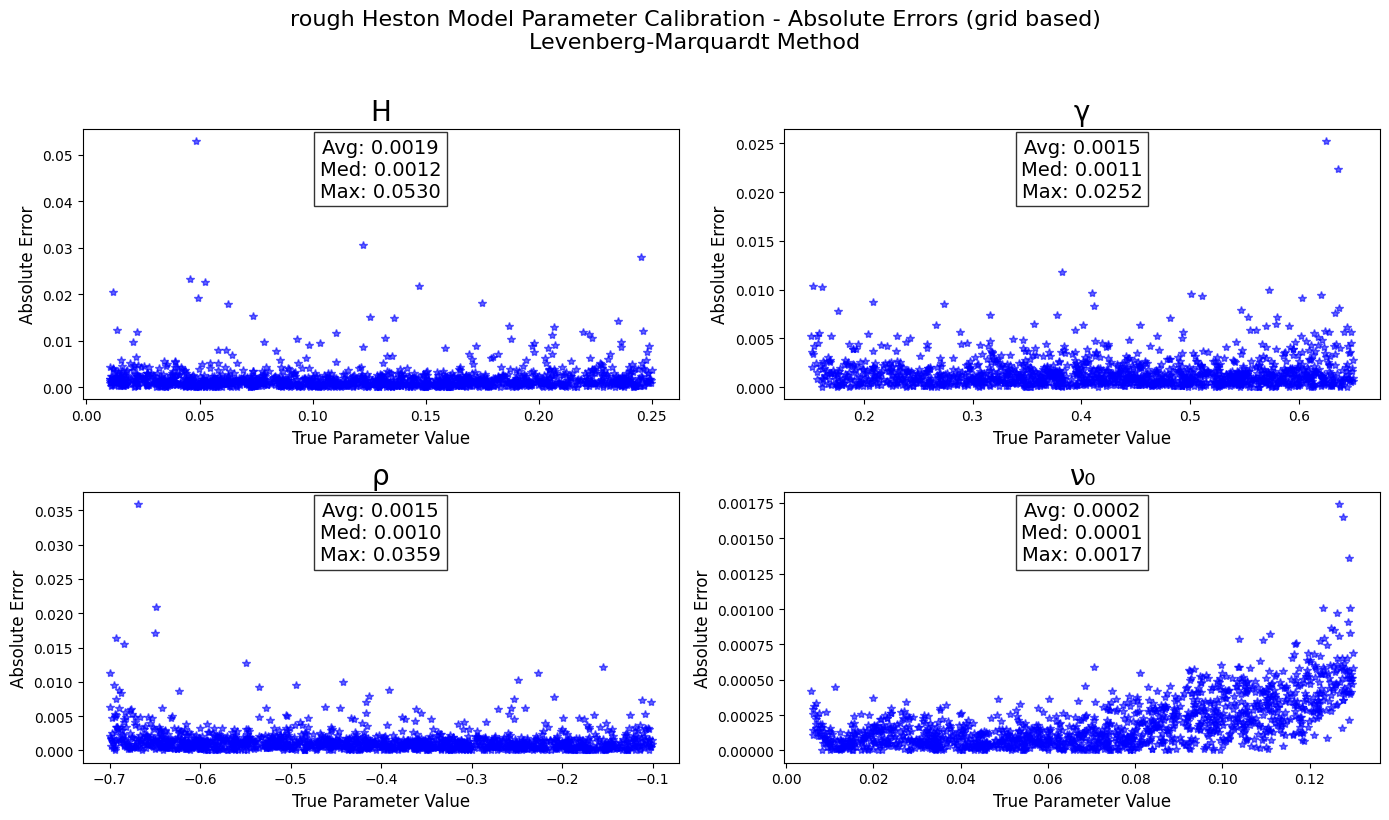


Summary Statistics of Absolute Errors:
H: Avg=0.001856, Med=0.001168, Max=0.052985
γ: Avg=0.001533, Med=0.001096, Max=0.025248
ρ: Avg=0.001462, Med=0.001044, Max=0.035896
ν₀: Avg=0.000197, Med=0.000141, Max=0.001741


In [22]:
# Correct parameter names and absolute error analysis
absolute_errors = np.zeros((len(LMParameters), 4))  # Store all absolute errors

fig = plt.figure(figsize=(14, 8))
for param_idx in range(4):
    ax = plt.subplot(2, 2, param_idx+1)
    
    # Get true and calibrated parameters
    true_params = X_test[:len(LMParameters), param_idx]
    calibrated_params = LMParameters[:, param_idx]
    
    # Calculate absolute errors
    abs_errors = np.abs(calibrated_params - true_params)
    absolute_errors[:, param_idx] = abs_errors
    
    # Plot
    plt.plot(true_params, abs_errors, 'b*', alpha=0.6)
    plt.title(titles[param_idx], fontsize=20)
    plt.xlabel('True Parameter Value', fontsize=12)
    plt.ylabel('Absolute Error', fontsize=12)
    
    # Add statistics
    stats_text = 'Avg: %1.4f\nMed: %1.4f\nMax: %1.4f' % (
        np.mean(abs_errors),
        np.median(abs_errors),
        np.max(abs_errors))
    
    plt.text(0.5, 0.85, stats_text,
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes,
             fontsize=14,
             bbox=dict(facecolor='white', alpha=0.8))

plt.suptitle('rough Heston Model Parameter Calibration - Absolute Errors (grid based)\nLevenberg-Marquardt Method', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis
print("\nSummary Statistics of Absolute Errors:")
for i, title in enumerate(titles):
    print(f"{title}: Avg={np.mean(absolute_errors[:,i]):.6f}, "
          f"Med={np.median(absolute_errors[:,i]):.6f}, "
          f"Max={np.max(absolute_errors[:,i]):.6f}")

# Gradient-free optimization
And here we will exploit 3 different gradient free optimization methods: **COBYLA**, **Differential Evolution** and **Nelder-Mayer**.
We will use this configuration of parameters for these algorithms and compare both accuracy and calibration time.

In [23]:
# =====================================================================================
# GRADIENT-FREE CALIBRATION WITH DIFFERENT ALGORITHMS
# =====================================================================================

# Define loss functions (only cost function needed for gradient-free methods), they're the same as gradient one, but clearly don't require the Jacobian
# Define parameter bounds in scaled space [-1, 1] for all parameters
bounds_scaled = [(-1, 1) for _ in range(4)]

# =====================================================================================
# GRADIENT-FREE CALIBRATION WITH DIFFERENT ALGORITHMS
# =====================================================================================

# Initialize arrays for results
solutions = np.zeros([3, 4])  # 3 methods, 4 parameters
times = np.zeros(3)

Approx_GF = []  # GF = Gradient-Free
Timing_GF = []

methods = ["COBYLA", "Differential Evolution", "Nelder-Mead"]
init = np.zeros(4)  # Initial guess for optimization (scaled space)

print("Starting Gradient-Free Calibration...")
print(f"Total samples to calibrate: {y_test_transform.shape[0]}")

# Calibrate all surfaces in test set
for i in range(y_test_transform.shape[0]):
    disp = str(i+1) + "/" + str(y_test_transform.shape[0])
    print(disp, end="\r")
    
    # COBYLA (Constrained Optimization BY Linear Approximation)
    start = time.perf_counter()
    I = scipy.optimize.minimize(
        CostFunc, 
        x0=init, 
        args=(i,), 
        method='COBYLA',
        bounds=bounds_scaled,
        options={
            "maxiter": 5000,
            "disp": False,
            "catol": 1e-8,  # Constraint absolute tolerance
            "tol": 1e-10    # Function tolerance
        }
    )
    end = time.perf_counter()
    solutions[0, :] = max_min_scale_inverse(I.x)
    times[0] = end - start
    
    # Differential Evolution
    start = time.perf_counter()
    I = scipy.optimize.differential_evolution(
        CostFunc, 
        bounds=bounds_scaled,
        args=(i,), 
        popsize=50,          # Population size
        strategy='best1bin',  # Strategy
        mutation=0.65,       # Mutation factor
        recombination=0.7,   # Crossover recombination probability
        tol=0.01,           # Convergence tolerance
        maxiter=1000,       # Maximum iterations
        disp=False,
        seed=42             # For reproducibility
    )
    end = time.perf_counter()
    solutions[1, :] = max_min_scale_inverse(I.x)
    times[1] = end - start
    
    # Nelder-Mead (Simplex method)
    start = time.perf_counter()
    I = scipy.optimize.minimize(
        CostFunc, 
        x0=init, 
        args=(i,), 
        method='Nelder-Mead',
        options={
            "maxiter": 5000,
            "maxfev": 10000,    # Maximum function evaluations
            "disp": False,
            "xatol": 1e-8,      # Absolute error in parameters
            "fatol": 1e-10,     # Absolute error in function value
            "adaptive": True    # Adaptive algorithm parameters
        }
    )
    end = time.perf_counter()
    solutions[2, :] = max_min_scale_inverse(I.x)
    times[2] = end - start
    
    Approx_GF.append(np.copy(solutions))
    Timing_GF.append(np.copy(times))

print("\nGradient-Free Calibration completed!")

Starting Gradient-Free Calibration...
Total samples to calibrate: 1404
1404/1404
Gradient-Free Calibration completed!


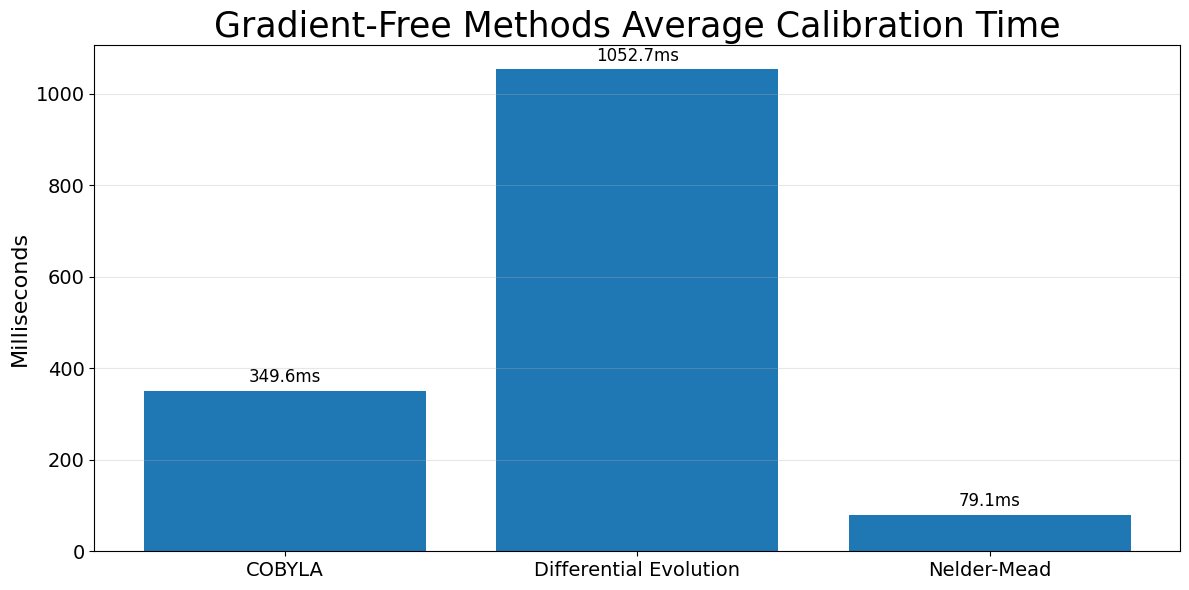

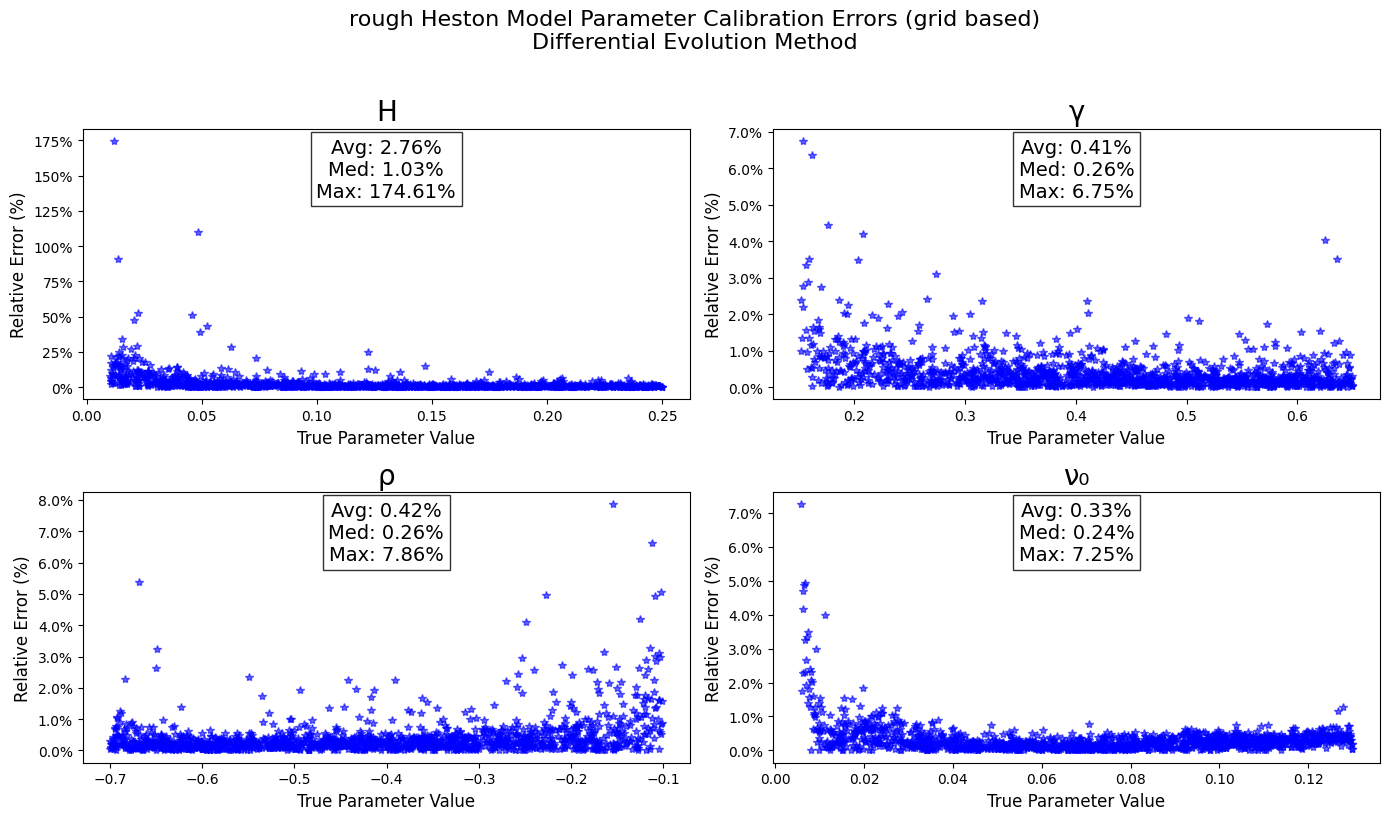


Summary Statistics of Relative Errors (%):
H: Avg=2.76%, Med=1.03%, Max=174.61%
γ: Avg=0.41%, Med=0.26%, Max=6.75%
ρ: Avg=0.42%, Med=0.26%, Max=7.86%
ν₀: Avg=0.33%, Med=0.24%, Max=7.25%


In [24]:
# =====================================================================================
# RESULTS ANALYSIS AND VISUALIZATION
# =====================================================================================

# Plot average calibration times
methods_display = ["COBYLA", "Differential Evolution", "Nelder-Mead"]
plt.figure(figsize=(12, 6))
mean_times_ms = np.mean(Timing_GF, axis=0) * 1000  # Convert to milliseconds
plt.bar(methods_display, mean_times_ms)
plt.title("Gradient-Free Methods Average Calibration Time", fontsize=25)
plt.ylabel("Milliseconds", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(mean_times_ms):
    plt.text(i, v + max(mean_times_ms)*0.01, f'{v:.1f}ms', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Analyze Gradient-Free optimization results (Differential Evolution)
DEParameters = np.array([Approx_GF[i][1] for i in range(len(Approx_GF))])  # DE is index 1

# Verify dimensions
assert len(DEParameters) == len(X_test), "Mismatch between calibrated parameters and test set"

# Plot relative errors for each parameter
relative_errors = np.zeros((len(DEParameters), 4))  # Store all relative errors

fig = plt.figure(figsize=(14, 8))
for param_idx in range(4):
    ax = plt.subplot(2, 2, param_idx+1)
    
    # Get true and calibrated parameters
    true_params = X_test[:len(DEParameters), param_idx]
    calibrated_params = DEParameters[:, param_idx]
    
    # Calculate relative errors
    with np.errstate(divide='ignore', invalid='ignore'):
        rel_errors = np.abs(calibrated_params - true_params) / np.abs(true_params)
    
    relative_errors[:, param_idx] = rel_errors
    
    # Plot with consistent style
    plt.plot(true_params, 100 * rel_errors, 'b*', alpha=0.6)
    plt.title(titles[param_idx], fontsize=20)
    plt.xlabel('True Parameter Value', fontsize=12)
    plt.ylabel('Relative Error (%)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Add statistics - matching gradient-based version
    stats_text = 'Avg: %1.2f%%\nMed: %1.2f%%\nMax: %1.2f%%' % (
        np.mean(100 * rel_errors),
        np.median(100 * rel_errors),
        np.max(100 * rel_errors))
    
    plt.text(0.5, 0.85, stats_text,
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes,
             fontsize=14,
             bbox=dict(facecolor='white', alpha=0.8))

plt.suptitle('rough Heston Model Parameter Calibration Errors (grid based)\nDifferential Evolution Method', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis with same format
print("\nSummary Statistics of Relative Errors (%):")
for i, title in enumerate(titles):
    print(f"{title}: Avg={np.mean(100*relative_errors[:,i]):.2f}%, "
          f"Med={np.median(100*relative_errors[:,i]):.2f}%, "
          f"Max={np.max(100*relative_errors[:,i]):.2f}%")

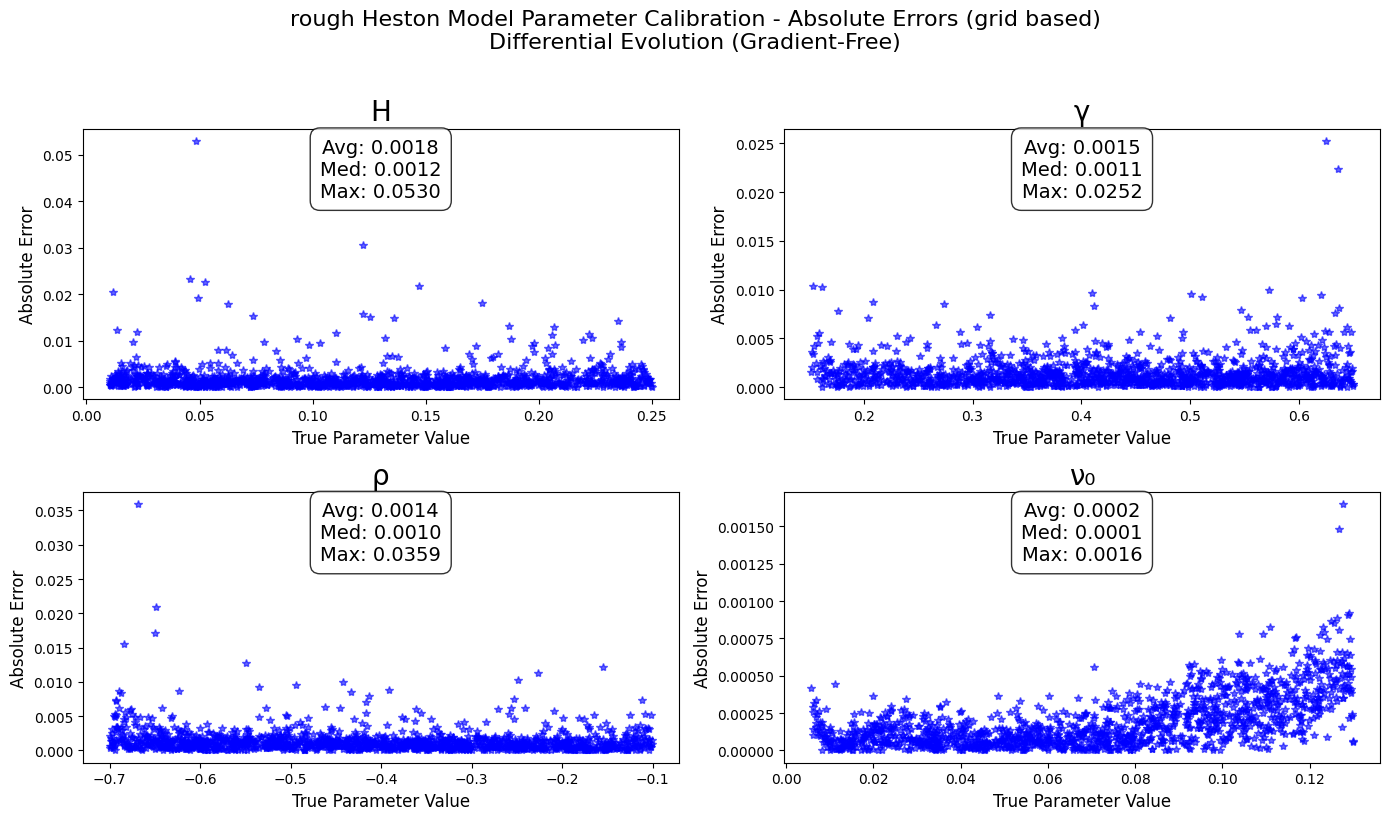


Summary Statistics of Absolute Errors:
H: Avg=0.001812, Med=0.001151, Max=0.052984
γ: Avg=0.001502, Med=0.001087, Max=0.025249
ρ: Avg=0.001435, Med=0.001031, Max=0.035904
ν₀: Avg=0.000194, Med=0.000140, Max=0.001648


In [25]:
# Plot absolute errors for each parameter
absolute_errors = np.zeros((len(DEParameters), 4))  # Store all absolute errors

fig = plt.figure(figsize=(14, 8))
for param_idx in range(4):
    ax = plt.subplot(2, 2, param_idx+1)
    
    # Get true and calibrated parameters
    true_params = X_test[:len(DEParameters), param_idx]
    calibrated_params = DEParameters[:, param_idx]
    
    # Calculate absolute errors
    abs_errors = np.abs(calibrated_params - true_params)
    absolute_errors[:, param_idx] = abs_errors
    
    # Plot with consistent style
    plt.plot(true_params, abs_errors, 'b*', alpha=0.6)
    plt.title(titles[param_idx], fontsize=20)
    plt.xlabel('True Parameter Value', fontsize=12)
    plt.ylabel('Absolute Error', fontsize=12)
    
    # Add statistics with consistent formatting
    stats_text = 'Avg: %1.4f\nMed: %1.4f\nMax: %1.4f' % (
        np.mean(abs_errors),
        np.median(abs_errors),
        np.max(abs_errors))
    
    plt.text(0.5, 0.85, stats_text,
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes,
             fontsize=14,
             bbox=dict(facecolor='white', alpha=0.8,
                      boxstyle='round,pad=0.5'))

plt.suptitle('rough Heston Model Parameter Calibration - Absolute Errors (grid based)\nDifferential Evolution (Gradient-Free)', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis with consistent output format
print("\nSummary Statistics of Absolute Errors:")
for i, title in enumerate(titles):
    print(f"{title}: Avg={np.mean(absolute_errors[:,i]):.6f}, "
          f"Med={np.median(absolute_errors[:,i]):.6f}, "
          f"Max={np.max(absolute_errors[:,i]):.6f}")

In [26]:
# =====================================================================================
# COMPREHENSIVE PERFORMANCE COMPARISON
# =====================================================================================

print("\n" + "="*70)
print("GRADIENT-FREE CALIBRATION PERFORMANCE SUMMARY")
print("="*70)

# Timing comparison
print("\nTiming Comparison (Average per calibration):")
for i, method in enumerate(methods_display):
    avg_time = np.mean(Timing_GF, axis=0)[i]
    print(f"{method:20s}: {avg_time*1000:8.2f} ms")

print("\nRelative Error Statistics for Differential Evolution:")
print("-" * 60)
for i, (title, param_name) in enumerate(zip(titles, titles)):
    errors = 100 * relative_errors[:, i]
    print(f"{param_name:20s} ({title}): Avg={np.mean(errors):6.2f}% | "
          f"Med={np.median(errors):6.2f}% | Std={np.std(errors):6.2f}% | "
          f"Max={np.max(errors):6.2f}%")

# Overall performance metrics
overall_avg_error = np.mean(100 * relative_errors)
overall_med_error = np.median(100 * relative_errors.flatten())
print("\nOverall Performance:")
print(f"Average relative error across all parameters: {overall_avg_error:.2f}%")
print(f"Median relative error across all parameters:  {overall_med_error:.2f}%")

# Success rate (define success as relative error < 5%)
success_rate = np.mean(relative_errors < 0.05) * 100
print(f"Success rate (relative error < 5%):           {success_rate:.1f}%")
print("="*70)


GRADIENT-FREE CALIBRATION PERFORMANCE SUMMARY

Timing Comparison (Average per calibration):
COBYLA              :   349.59 ms
Differential Evolution:  1052.74 ms
Nelder-Mead         :    79.08 ms

Relative Error Statistics for Differential Evolution:
------------------------------------------------------------
H                    (H): Avg=  2.76% | Med=  1.03% | Std=  7.52% | Max=174.61%
γ                    (γ): Avg=  0.41% | Med=  0.26% | Std=  0.53% | Max=  6.75%
ρ                    (ρ): Avg=  0.42% | Med=  0.26% | Std=  0.61% | Max=  7.86%
ν₀                   (ν₀): Avg=  0.33% | Med=  0.24% | Std=  0.45% | Max=  7.25%

Overall Performance:
Average relative error across all parameters: 0.98%
Median relative error across all parameters:  0.32%
Success rate (relative error < 5%):           96.9%
